<a href="https://colab.research.google.com/github/taehyeong51/SKT-FLY-AI-Challenger/blob/main/3%EC%A3%BC%EC%B0%A8_01_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 증강

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


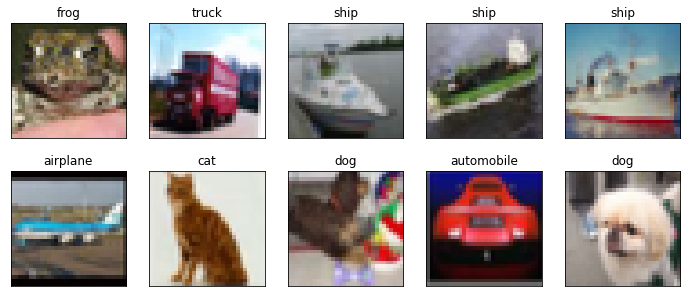

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
samples = np.random.randint(len(X_train), size=10)
plt.figure(figsize=(12, 5))
for i, idx in enumerate(samples):
  plt.subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.title((class_names[y_train[idx][0]]))
  plt.imshow(X_train[idx])
plt.show()

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
X_train, y_train, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35000,)
(15000,)
(10000,)


원-핫 인코딩

In [ ]:
import tensorflow as tf
y_train_oh = tf.one_hot(y_train, depth=10)
y_val_oh = tf.one_hot(y_val, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)
print(y_train_oh.shape)
y_train_oh[:5]

(35000, 10)


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
y_train_oh = y_train_oh.numpy()
y_val_oh = y_val_oh.numpy()
y_test_oh = y_test_oh.numpy()
print(y_train_oh.shape)
print(y_val_oh.shape)
print(y_test_oh.shape)

(35000, 10)
(15000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras import layers
def build_model():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, 3, padding = 'same',
  activation='relu', input_shape = (32, 32, 3)))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(64, 3, padding = 'same',
  activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(256, 3, padding = 'same',
  activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(256, 3, padding = 'same',
  activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

모델 학습

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
loss = 'categorical_crossentropy',
metrics=['acc'])
EPOCHS = 100
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
  epochs = EPOCHS,
  batch_size = BATCH_SIZE,
  validation_data = (X_val, y_val_oh))

Epoch 1/100
137/137 [==============================] - 13s 26ms/step - loss: 2.1476 - acc: 0.1968 - val_loss: 1.9820 - val_acc: 0.2877
Epoch 2/100
137/137 [==============================] - 3s 20ms/step - loss: 1.8355 - acc: 0.3273 - val_loss: 1.7887 - val_acc: 0.3405
Epoch 3/100
137/137 [==============================] - 3s 21ms/step - loss: 1.7138 - acc: 0.3679 - val_loss: 1.6992 - val_acc: 0.3749
Epoch 4/100
137/137 [==============================] - 3s 19ms/step - loss: 1.6467 - acc: 0.3942 - val_loss: 1.6477 - val_acc: 0.3951
Epoch 5/100
137/137 [==============================] - 3s 19ms/step - loss: 1.5844 - acc: 0.4191 - val_loss: 1.5858 - val_acc: 0.4247
Epoch 6/100
137/137 [==============================] - 3s 19ms/step - loss: 1.5383 - acc: 0.4351 - val_loss: 1.5462 - val_acc: 0.4367
Epoch 7/100
137/137 [==============================] - 3s 21ms/step - loss: 1.4987 - acc: 0.4511 - val_loss: 1.5122 - val_acc: 0.4534
Epoch 8/100
137/137 [==============================] - 3s 19m

학습곡선 plot

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
  plt.legend()
  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
  plt.legend()
  plt.show()

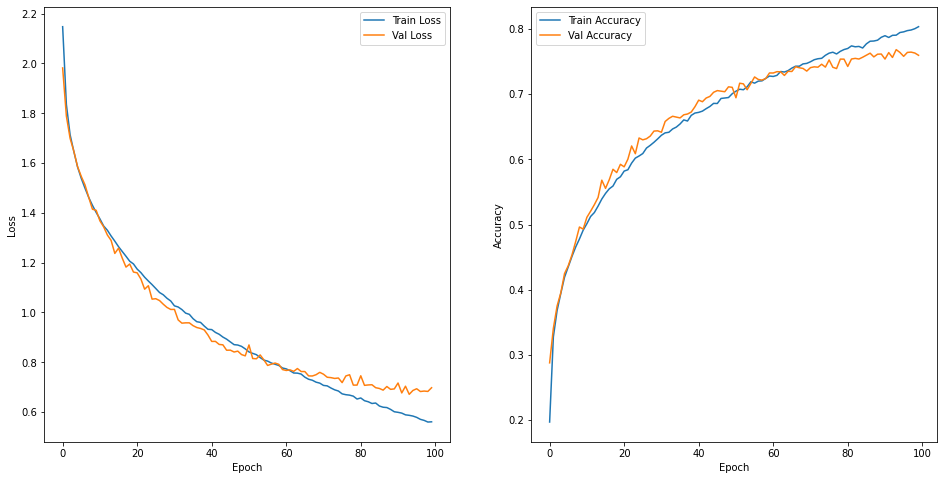

In [ ]:
plot_history(history)

### Data Augmentation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

# 2. 가위바위보

In [ ]:
# 훈련용 이미지
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /tmp/rps.zip

# 테스트용 이미지
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
  -O /tmp/rps-test-set.zip

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print('Total number of training rock images:', len(rock_files))
print('Total number of training paper images:', len(paper_files))
print('Total number of training scissors images:', len(scissors_files))

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])



--2023-01-04 02:18:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  21.1MB/s    in 10s     

2023-01-04 02:18:25 (18.7 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2023-01-04 02:18:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/

/tmp/rps/rock/rock04-098.png


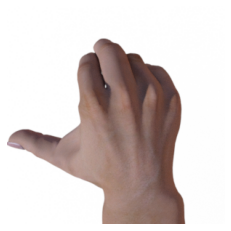

/tmp/rps/rock/rock02-119.png


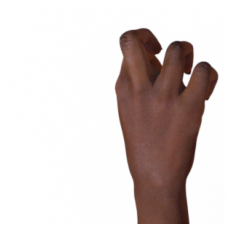

/tmp/rps/paper/paper01-118.png


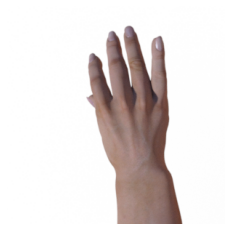

/tmp/rps/paper/paper06-010.png


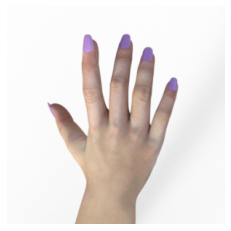

/tmp/rps/scissors/testscissors01-041.png


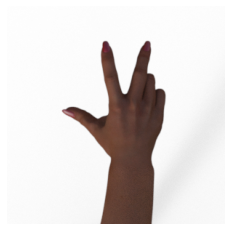

/tmp/rps/scissors/testscissors02-102.png


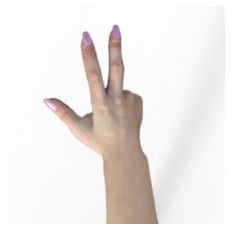

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150,150),
class_mode='categorical',
batch_size=126
)

model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  # This is the first convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  # The second convolution
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The third convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # The fourth convolution
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=100, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

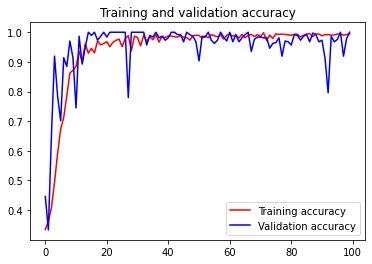

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()